In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [95]:
exec(open('../rawCode/Reconstructer_Classes.py').read())
exec(open('../rawCode/HelperFunctions.py').read())
exec(open('../rawCode/Filter_Classes.py').read())

In [96]:
res_errG_day6 = pd.read_csv('../rawCode/res_errG_day6.csv')
res_std_day6 = pd.read_csv('../rawCode/res_std_day6.csv')
res_errG_day10 = pd.read_csv('../rawCode/res_errG_day10.csv')
res_std_day10 = pd.read_csv('../rawCode/res_std_day10.csv')
res_errG_day7 = pd.read_csv('../rawCode/res_errG_day7.csv')
res_std_day7 = pd.read_csv('../rawCode/res_std_day7.csv')


In [99]:
res_std = pd.concat([res_std_day6,res_std_day7,res_std_day10])
res_errG = pd.concat([res_errG_day6,res_errG_day10,res_errG_day7])

     Unnamed: 0  error_included  number_of_clusters Reconstruction  \
0             0            True                 166            row   
1             1            True                 175            row   
2             2            True                 223            row   
3             3            True                 201            row   
4             4            True                 217            row   
..          ...             ...                 ...            ...   
135          23            True                  37            all   
136          24            True                  40            all   
137          25           False                  48            all   
138          26            True                  19            all   
139          27           False                  22            all   

          Filter        Date  
0        ErrGrow  2022-02-06  
1        ErrGrow  2022-02-06  
2        ErrGrow  2022-02-06  
3        ErrGrow  2022-02-06  
4   

In [98]:
def matrix(errL,name,save):
    sumClust = errL['number_of_clusters'].sum()
    tp, fn = errL['error_included'].value_counts()
    fp = sumClust-tp

    plt.figure(figsize=(1,1))
    fig, ax = plt.subplots()
    ax.axis('off')

    ax.table([["NA",tp],[fn,fp]],rowLabels=['True','False'],colLabels=['False','True'],loc="center",colWidths=[.2,.2])

    ax.autoscale()
    fig.suptitle('Matrix: '+ name)
    path= '../plots/'
    plt.savefig(path+save+".png", facecolor="white")



<Figure size 72x72 with 0 Axes>

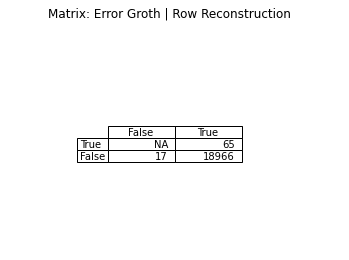

In [112]:
matrix(res_errG.loc[res_errG['Reconstruction'] == "row"],"Error Groth | Row Reconstruction","m-eG-rowRecon")

<Figure size 72x72 with 0 Axes>

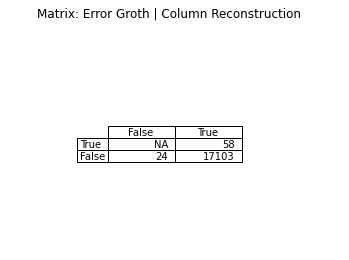

In [111]:
matrix(res_errG.loc[res_errG['Reconstruction'] == "col"],"Error Groth | Column Reconstruction","m-eG-colRecon")

<Figure size 72x72 with 0 Axes>

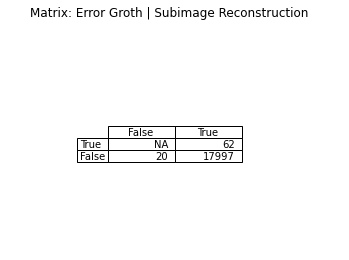

In [110]:
matrix(res_errG.loc[res_errG['Reconstruction'] == "sub"],"Error Groth | Subimage Reconstruction","m-eG-subRecon")

<Figure size 72x72 with 0 Axes>

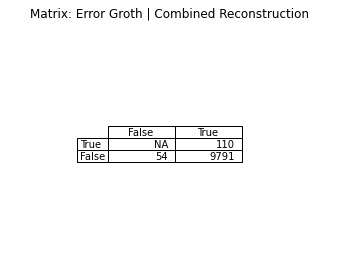

In [109]:
matrix(res_errG.loc[res_errG['Reconstruction'] == "all"],"Error Groth | Combined Reconstruction","m-eG-allRecon")

<Figure size 72x72 with 0 Axes>

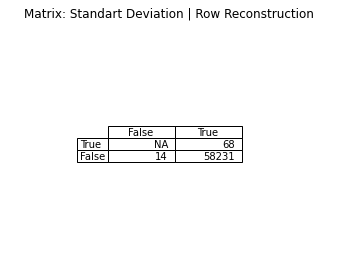

<Figure size 72x72 with 0 Axes>

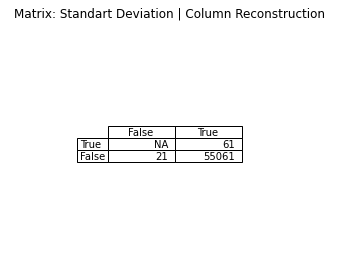

<Figure size 72x72 with 0 Axes>

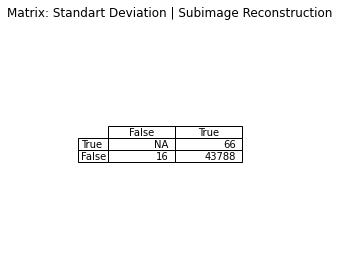

<Figure size 72x72 with 0 Axes>

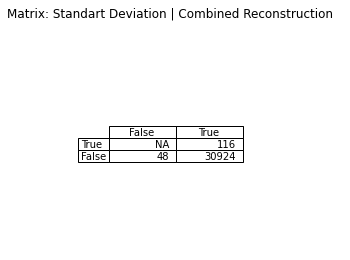

In [108]:
matrix(res_std.loc[res_std['Reconstruction'] == "row"],"Standart Deviation | Row Reconstruction","m-std-rowRecon")
matrix(res_std.loc[res_std['Reconstruction'] == "col"],"Standart Deviation | Column Reconstruction","m-std-colRecon")
matrix(res_std.loc[res_std['Reconstruction'] == "sub"],"Standart Deviation | Subimage Reconstruction","m-std-subRecon")
matrix(res_std.loc[res_std['Reconstruction'] == "all"],"Standart Deviation | Combined Reconstruction","m-std-allRecon")